# Cardio Good Fitness Project
The following serves as an analysis on the customer base of Cardio Good Fitness

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [7]:
raw_data = pd.read_csv('CardioGoodFitness.csv')
raw_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [8]:
raw_data.info() #No missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
raw_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [10]:
columns = raw_data.columns.to_list()
[print('The unique values for ',x,' is: ',raw_data[x].unique().tolist()) for x in columns]

The unique values for  Product  is:  ['TM195', 'TM498', 'TM798']
The unique values for  Age  is:  [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42]
The unique values for  Gender  is:  ['Male', 'Female']
The unique values for  Education  is:  [14, 15, 12, 13, 16, 18, 20, 21]
The unique values for  MaritalStatus  is:  ['Single', 'Partnered']
The unique values for  Usage  is:  [3, 2, 4, 5, 6, 7]
The unique values for  Fitness  is:  [4, 3, 2, 1, 5]
The unique values for  Income  is:  [29562, 31836, 30699, 32973, 35247, 37521, 36384, 38658, 40932, 34110, 39795, 42069, 44343, 45480, 46617, 48891, 53439, 43206, 52302, 51165, 50028, 54576, 68220, 55713, 60261, 67083, 56850, 59124, 61398, 57987, 64809, 47754, 65220, 62535, 48658, 54781, 48556, 58516, 53536, 61006, 57271, 52291, 49801, 62251, 64741, 70966, 75946, 74701, 69721, 83416, 88396, 90886, 92131, 77191, 52290, 85906, 103336, 99601, 89641, 95866, 104581, 95508]

[None, None, None, None, None, None, None, None, None]

In [11]:
data_manip = raw_data.copy()

In [12]:
index_map = data_manip['MaritalStatus'].unique()
print(pd.Series(index_map))

0       Single
1    Partnered
dtype: object


In [13]:
data_manip.loc[data_manip['MaritalStatus']=='Single','MaritalStatus']=0

data_manip.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,0,3,4,29562,112
1,TM195,19,Male,15,0,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,0,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [14]:
#To be able to appreciate the distribution of all the data, columns with strings values
# will be turned into numerical codes

for x in columns:
    if type(data_manip[x][0])==str:
        index_map = data_manip[x].unique()
        print(pd.Series(index_map))
        indx = 0
        for i in index_map:
            data_manip.loc[data_manip[x]==i,x]=indx
            indx+=1
data_manip.head()


0    TM195
1    TM498
2    TM798
dtype: object
0      Male
1    Female
dtype: object


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,18,0,14,0,3,4,29562,112
1,0,19,0,15,0,2,3,31836,75
2,0,19,1,14,Partnered,4,3,30699,66
3,0,19,0,12,0,3,3,32973,85
4,0,20,0,13,Partnered,4,2,35247,47


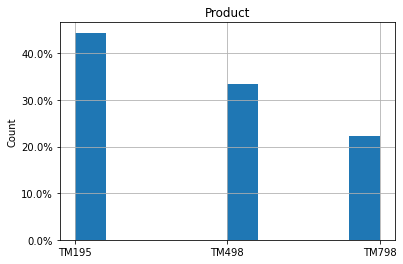

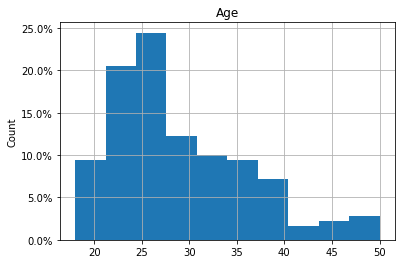

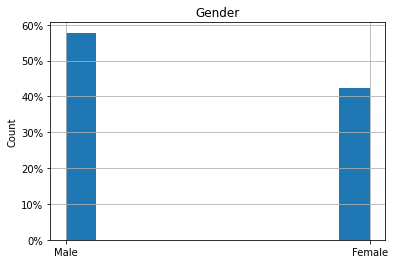

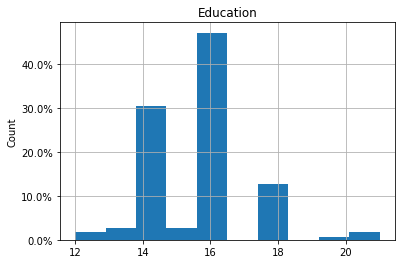

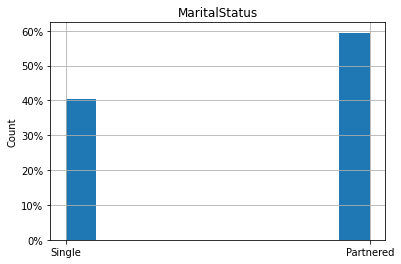

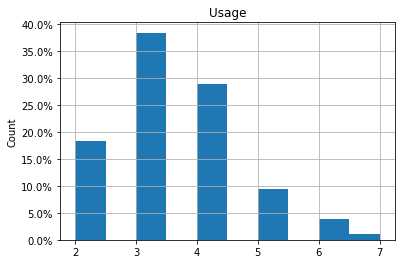

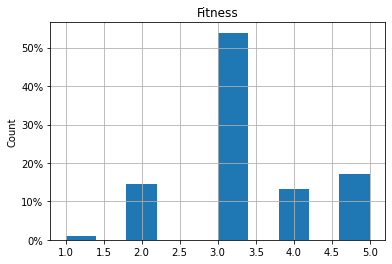

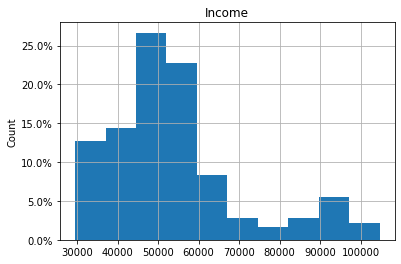

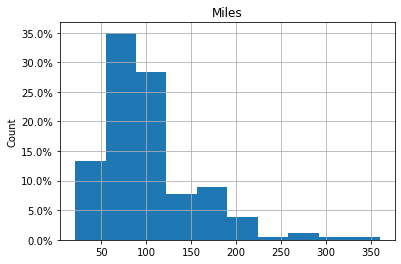

In [15]:
for x in columns:
    raw_data[str(x)].hist(weights=np.ones(len(raw_data[str(x)])) / len(raw_data[str(x)]))
    plt.title(x)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.ylabel('Count')
    plt.show()



Based on a supervisial observation of the data variable distributions, we can further clean up the data to include only critical aspects to make a consumer profile using these products:

In [16]:
# raw_data.groupby(['Gender']).sum().plot(kind='pie', label='')


In [25]:
consumer_variables = ['Age','Gender','Education','Income','MaritalStatus']
customer_data = raw_data[consumer_variables].copy()

Gender = customer_data['Gender'].unique()
dict_gender = {}
for t in Gender:
    dict_gender[t]=customer_data['Gender'].value_counts()[t]

marital = customer_data['MaritalStatus'].unique()
dict_marital = {}
for m in marital:
    dict_marital[m]=customer_data['MaritalStatus'].value_counts()[m]

Age = customer_data.groupby(['Gender', pd.cut(customer_data.Gender, 3)])



TypeError: can only concatenate str (not "float") to str

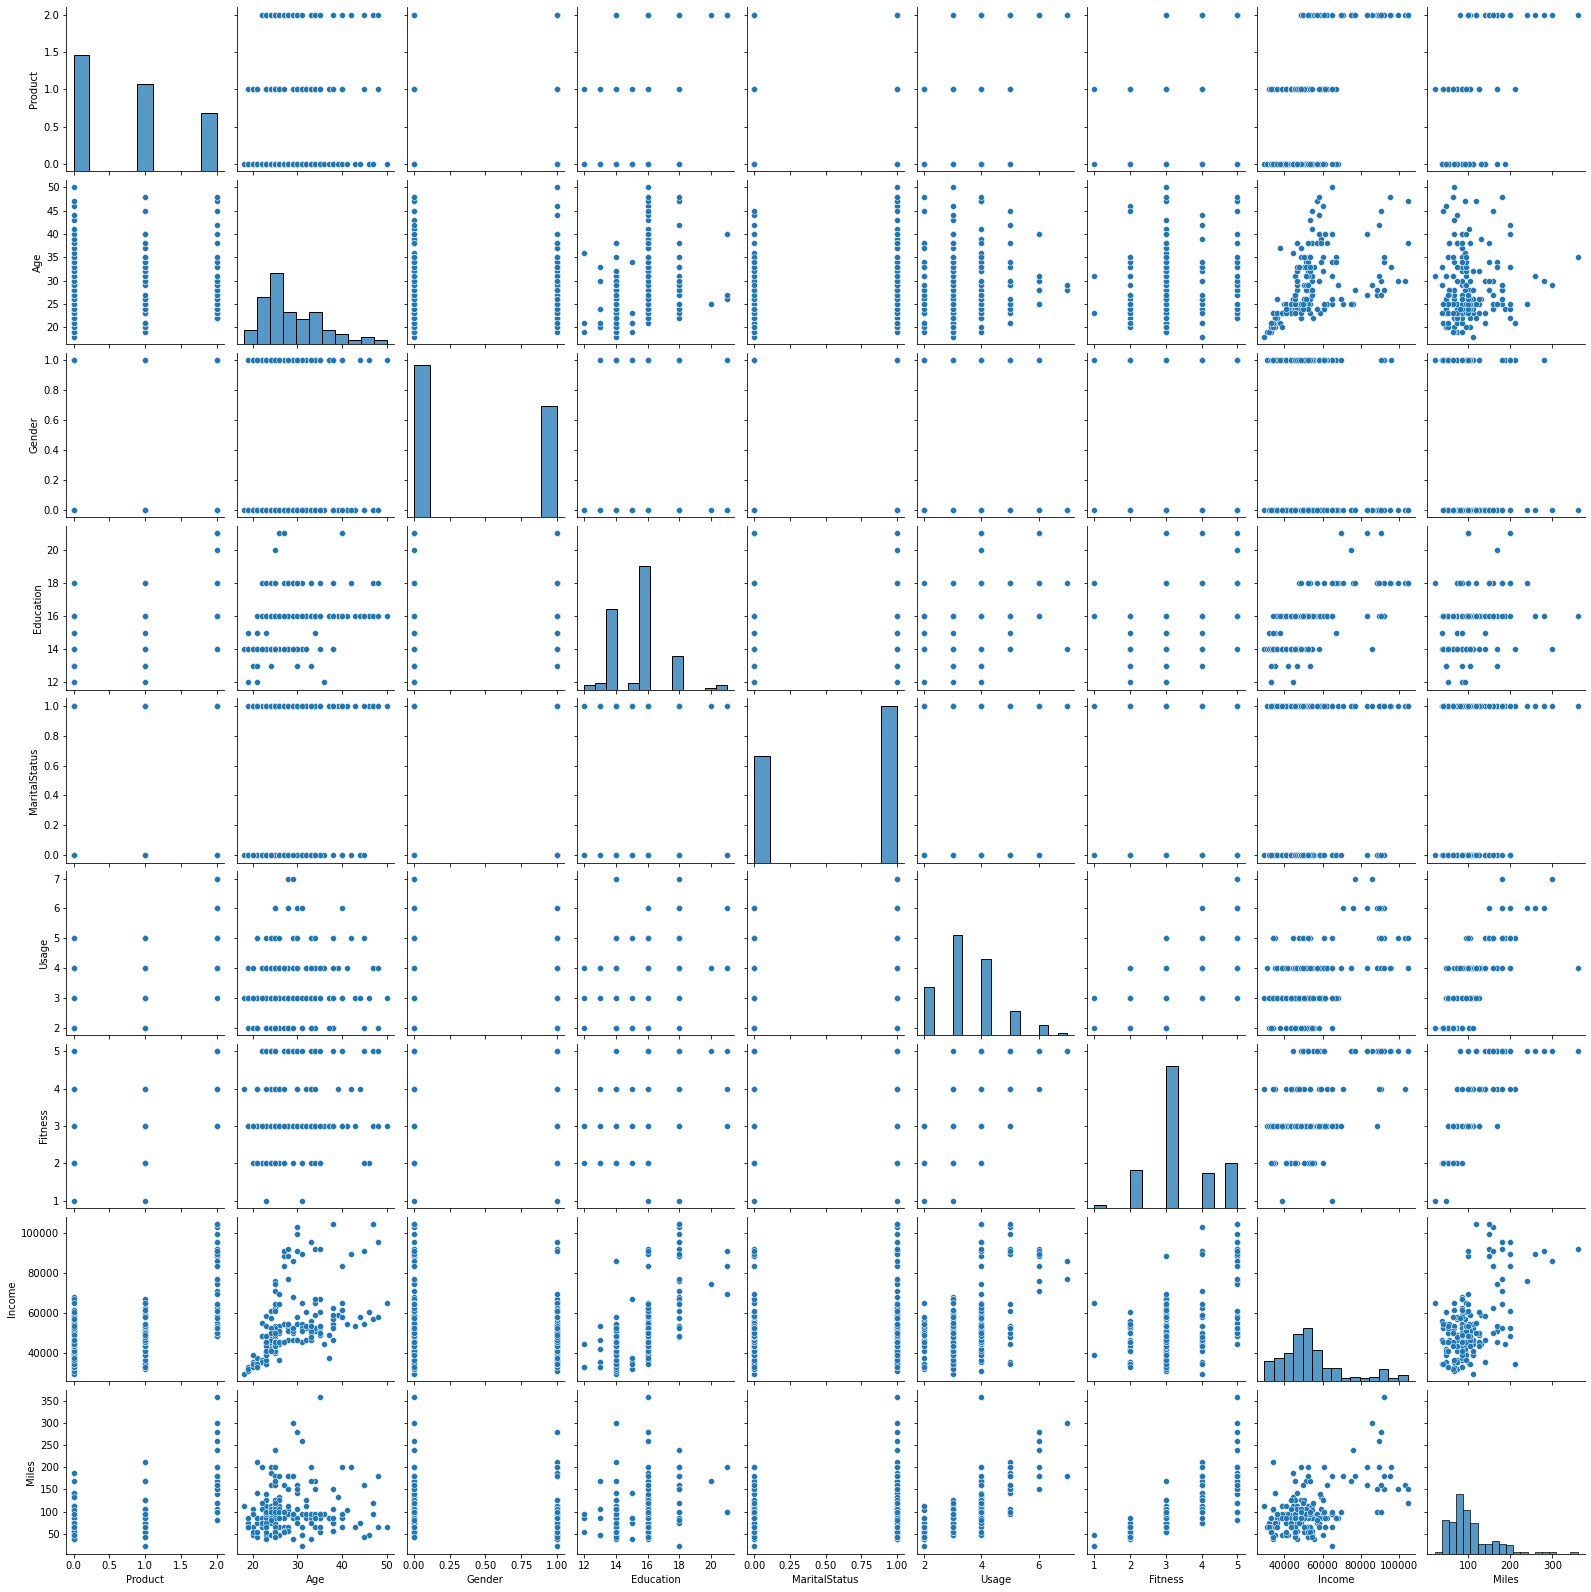

In [67]:
#What correlations are there between key variables couples?
sns.pairplot(data_manip)

At first glance, there are some interesting multivariate qualities to explore:
#### Relations to explore related to: Product
- The third product seems to be more frequently purchased by people with higher incomes
- The third product is the least bought and the most used
- The third product seems to also be correlated with higher fitness levels

#### Relations to explore related to: Marital Status
- Usage and Miles have (as expected) a positive correlation. Furthermore, Marital Status seems to have a positive relation with miles, but this relation is not captured when observing usage (explore)
- 60% of users are partnered.
  - Is it because they have more disposable income or because it's a targeted market?

#### Relations to explore related to: Income
- When observing usage in the form of miles, the data seems to cluster between modest income/low miles and high income